<a href="https://colab.research.google.com/github/kasirao383/mood-emoji-of-python/blob/main/Hands_On_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd

# Data Collection

### Downloading MNIST Train and Test Datasets  

In [ ]:
# Downloading the datasets using wget
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv

--2021-04-08 10:46:41--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/train.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.64.38
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.64.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.22M  11.8MB/s    in 7.9s    

2021-04-08 10:46:50 (9.25 MB/s) - ‘train.csv’ saved [76775041/76775041]

--2021-04-08 10:46:50--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/kaggle_mnist/test.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.21

# Understanding the Data

## Loading Data

Loading the data from a csv file into python

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dataframe
**A dataframe is like a dictionary of lists, but with much more functionality**

*   A table of data (Rows and Columns)
*   2 Dimensional Data Structure


In [ ]:
type(train_df)

pandas.core.frame.DataFrame

**Creating a dataframe**

In [ ]:
people = {
    "name": ['Alfred', 'Jim', 'Mary', 'Jenny'],
    "age": [5, 6, 6, 7]
}

df = pd.DataFrame(people)
df

## Properties of a Dataframe

**Shape of a dataframe**



In [ ]:
train_df.shape

**`df.dtypes` returns the datatypes of each column in a DataFrame**


In [ ]:
train_df.dtypes

**`df.columns` returns the column labels of a DataFrame**


In [ ]:
train_df.columns

**`df.value_counts`** returns a Series containing counts of unique values.
* Can use to check whether the dataset is **balanced or imbalanced**

In [ ]:
train_df["label"].value_counts()

### df.head
* `df.head(n=10)`
  *   Returns the first `n` rows.
  * For negative values of `n`, this function returns all the rows except for the last `n` rows.


In [ ]:
train_df.head(n = 10)

### df.tail
* `df.tail(n=10)`
  *   Returns the last `n` rows.
  * For negative values of `n`, this function returns all rows except for the first `n` rows.

In [ ]:
train_df.tail(10)

### df.info
* `df.info()`
  * Print a concise summary of a DataFrame including the dtypes of the columns, memory usage, etc.

In [ ]:
train_df.info()

### df.describe
* `df.describe()`
  * Generates descriptive statistics.

In [ ]:
train_df.describe()

## Series
**A Series is like a list of data, but with much more functionality**


Creating Series from a List of Data

In [ ]:
pd.Series([1, 2, 3, 4, "asdf"])

In [ ]:
type(train_df['label'])

## Accessing Data

### df.loc

**Accessing by label / name**

* Access a group of rows and columns by label(s) or a boolean array
* Allowed inputs are:
    * single label
    * list or array of labels
    * slice object with labels (**both start and stop indices are included**)
    * boolean array of the same length as the axis being sliced

In [ ]:
train_df.loc[355]['label']

In [ ]:
train_df.loc[355:360,['label', 'pixel245']]

### df.iloc

**Accessing by position numbers**

* `df.iloc()`

  * Purely integer-location based indexing for selection by position.
  * Unlike in `loc`, if a slice object with indices is passed, then **stop index is excluded**

In [ ]:
train_df.iloc[355, 0]

In [ ]:
train_df.iloc[355:360,[0, 246]]

### df.at
* `df.at()`
  * Access a single value for a row/column label pair.
  * Can also set/update a value at a specified row/column pair
  * Use `at` only if you need to get or set a single value in a DataFrame or Series.


In [ ]:
train_df.at[355, 'label']

# Data Preprocessing

## Handling missing values

### pd.DataFrame.isna
* `pd.DataFrame.isna()`
  * Return a boolean same-sized object indicating if the values are NA.
  * `None` is considered as NA value.

In [ ]:
people = {
    "name": ['Alfred', 'Jim', 'Jenny'],
    "age": [5, 6, None]
}

df = pd.DataFrame(people)
df

In [ ]:
df.isna()

In [ ]:
train_df.isna()

**To find the number of `None` objects**

In [ ]:
df.isna().sum()

In [ ]:
train_df.isna().sum()

### pd.DataFrame.dropna

* `pd.DataFrame.dropna()`
  * Removes missing values
  * Returns a DataFrame with the NA entries dropped from it.

In [ ]:
df

In [ ]:
df.dropna(inplace=True)
df

In [ ]:
train_df.dropna(inplace=True)
train_df.shape

## Handling duplicates

### pd.DataFrame.duplicated
* `pd.DataFrame.duplicated()`
  * It returns a boolean series for each of the duplicated rows.
   

In [ ]:
people = {
    "name": ['Alfred', 'Jim', 'Jim', 'Jenny'],
    "age": [5, 6, 6, 6]
}

df = pd.DataFrame(people)
df

In [ ]:
df.duplicated()

In [ ]:
df[df.duplicated()]

In [ ]:
train_df[train_df.duplicated()]

### pd.DataFrame.drop_duplicates
* `pd.drop_duplicates()`
  * It returns a dataframe with the duplicated rows removed.
  

In [ ]:
df

In [ ]:
df.drop_duplicates(inplace=True)
df

In [ ]:
train_df.drop_duplicates(inplace=True)

# MNIST Data

### `Data` as Inputs and Outputs

* Inputs are represented as a Design Matrix $X$.
* Output vector is represented as $Y$.  

Outputs are also called as target labels. In case of MNIST dataset, the labels are {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

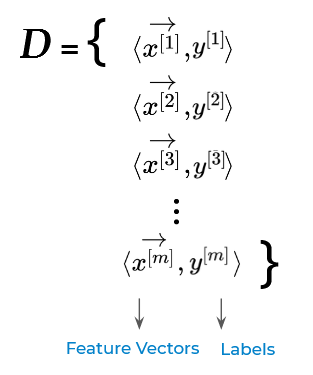

#### pd.DataFrame.drop
* `pd.DataFrame.drop(labels=None, axis=0, index=None, columns=None, inplace=False)`
  * `labels` is the index or column labels to drop.
  *  `axis` specifies the axis to drop the labels from.
  * `index` is an alternative to specifying the axis (labels, axis=0 is equivalent to index=labels)
  * `columns` is an alternative to specifying the axis (labels, axis=1 is equivalent to columns=labels).
  * `inplace`: If False, returns a copy. Otherwise, do operation inplace and return `None` (default `False`)


In [ ]:
train_df.drop(columns=['label'])

In [ ]:
train_df

#### pd.DataFrame.pop
Returns a column and drops it from dataframe

In [ ]:
label_target = train_df.pop('label')
label_target

In [ ]:
train_df

## Test Inputs

In [ ]:
test_df

## Visualizing the image from an input vector

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualise(image_df):
    image_1D = image_df.to_numpy()
    image_2D = image_1D.reshape((28,28))
    plt.imshow(image_2D, cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
print(label_target[892])
visualise(train_df.loc[892])